In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
data=pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# DATA ANALYSIS

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [8]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# DATA CLEANSING

In [9]:
#Converting object datatype values into numeric
from sklearn .preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=3:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 1


In [10]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [12]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


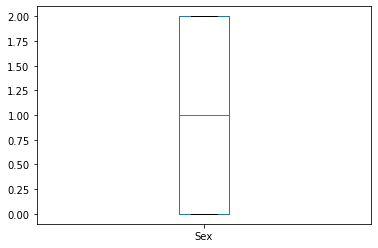

In [13]:
data["Sex"].plot.box()

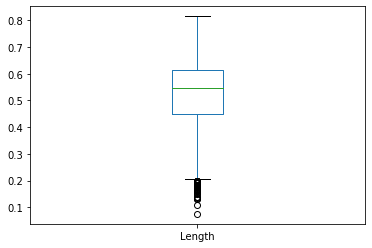

In [14]:
data["Length"].plot.box()

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [16]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [17]:
data_a=data[(z<3).all(axis=1)]
data_a.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
data_a.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [19]:
print(data.shape)
print(data_a.shape)

(4177, 9)
(4027, 9)


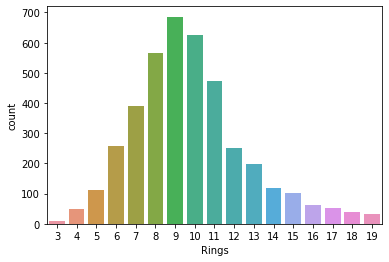

In [20]:
sns.countplot(x="Rings",data=data_a)

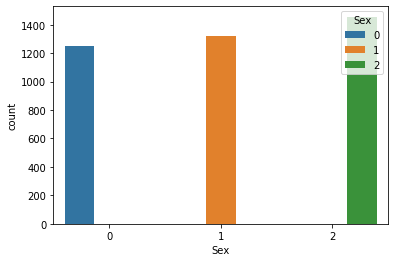

In [21]:
sns.countplot(x="Sex",hue="Sex",data=data_a)

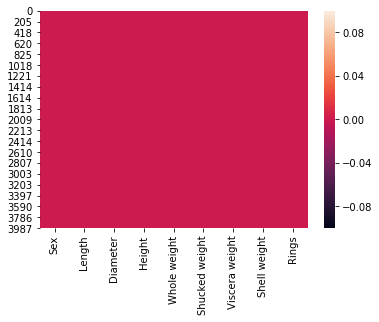

In [22]:
sns.heatmap(data_a.isnull())

In [23]:
from sklearn.preprocessing import normalize
data_a=normalize(data_a)

In [24]:
data_a=pd.DataFrame(data_a)

In [25]:
data_a.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.108078,0.070994,0.030797,-0.201076,-0.149315,-0.204680,-0.236782,-0.794676
1,0.108078,1.000000,0.976855,0.841649,0.568869,0.617099,0.547436,0.498354,-0.419949
2,0.070994,0.976855,1.000000,0.854477,0.628767,0.667593,0.601639,0.567878,-0.405688
3,0.030797,0.841649,0.854477,1.000000,0.646212,0.660209,0.628817,0.607831,-0.381536
4,-0.201076,0.568869,0.628767,0.646212,1.000000,0.968464,0.960600,0.954169,-0.268720
5,-0.149315,0.617099,0.667593,0.660209,0.968464,1.000000,0.916672,0.887825,-0.309262
6,-0.204680,0.547436,0.601639,0.628817,0.960600,0.916672,1.000000,0.908724,-0.253439
7,-0.236782,0.498354,0.567878,0.607831,0.954169,0.887825,0.908724,1.000000,-0.202854
8,-0.794676,-0.419949,-0.405688,-0.381536,-0.268720,-0.309262,-0.253439,-0.202854,1.000000


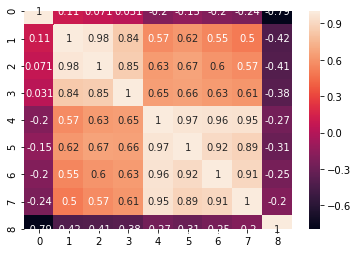

In [26]:
sns.heatmap(data_a.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210F1BDBD08>,
      dtype=object)

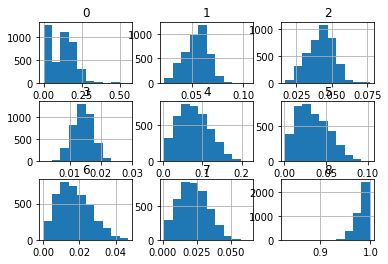

In [27]:
data_a.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210F1F73908>,
      dtype=object)

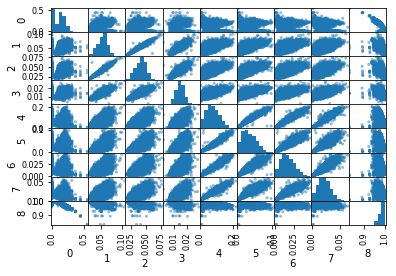

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_a)

In [29]:
data_a

,0,1,2,3,4,5,6,7,8
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897,0.989724
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591,0.959095
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182,0.993498
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149,0.977334
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760,0.987632
...,...,...,...,...,...,...,...,...,...
4022,0.000000,0.051029,0.040643,0.014902,0.080111,0.033417,0.021586,0.022489,0.993487
4023,0.194441,0.057360,0.042777,0.013125,0.093915,0.042680,0.020854,0.025326,0.972205
4024,0.213853,0.064156,0.050790,0.021920,0.125745,0.056190,0.030741,0.032933,0.962337
4025,0.000000,0.061798,0.047955,0.014832,0.108221,0.052504,0.025807,0.029268,0.988772


# SPLITTING DATA INTO TRAIN AND TETSING PHASE

In [30]:
x=data_a.drop([8],axis=1)
y=data_a[8]

In [31]:
x

,0,1,2,3,4,5,6,7
0,0.131963,0.030022,0.024083,0.006268,0.033915,0.014813,0.006664,0.009897
1,0.274027,0.047955,0.036309,0.012331,0.030897,0.013633,0.006645,0.009591
2,0.000000,0.058506,0.046363,0.014902,0.074733,0.028315,0.015620,0.023182
3,0.195467,0.043003,0.035673,0.012217,0.050430,0.021062,0.011142,0.015149
4,0.141090,0.046560,0.035978,0.011287,0.028924,0.012628,0.005573,0.007760
...,...,...,...,...,...,...,...,...
4022,0.000000,0.051029,0.040643,0.014902,0.080111,0.033417,0.021586,0.022489
4023,0.194441,0.057360,0.042777,0.013125,0.093915,0.042680,0.020854,0.025326
4024,0.213853,0.064156,0.050790,0.021920,0.125745,0.056190,0.030741,0.032933
4025,0.000000,0.061798,0.047955,0.014832,0.108221,0.052504,0.025807,0.029268


In [32]:
y

0       0.989724
1       0.959095
2       0.993498
3       0.977334
4       0.987632
          ...   
4022    0.993487
4023    0.972205
4024    0.962337
4025    0.988772
4026    0.967215
Name: 8, Length: 4027, dtype: float64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.31,random_state=0)

In [34]:
x_train.shape

(2778, 8)

In [35]:
y_train.shape

(2778,)

In [36]:
x_test.shape

(1249, 8)

In [37]:
y_test.shape

(1249,)

# APPLYING MODEL AND ALOGORITHM

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 43 is 0.8916676683942215


In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [40]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='r2'
# Spot Check Algorithms
models = []
models.append(('lm', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('dtc', DecisionTreeRegressor()))
models.append(('rfc', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lm: 0.833014 (0.057682)
KNN: 0.988930 (0.014470)
dtc: 0.990901 (0.007476)
rfc: 0.990551 (0.008871)


In [41]:
from sklearn.model_selection import GridSearchCV
# Build parameter grid
params= {'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
              }
# Build the model
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969745 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.908271 (0.059345) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.909633 (0.051933) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.907179 (0.063582) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.897163 (0.071268) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7}
0.910881 (0.058781) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.901089 (0.062026) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12}
0.910864 (0.051550) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.897070 (0.066418) with: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_le

In [42]:
#Make predictions for the best trained model
rfc=RandomForestRegressor(max_depth= 20,max_features='log2',min_samples_leaf= 1,min_samples_split=4)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(r2_score(y_test,predrfc))
print(mean_squared_error(y_test,predrfc))

0.9927568274327396
1.1202943132192396e-06


In [43]:
data1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data1

,Actual,Predicted
3526,0.982609,0.978405
3115,0.983861,0.979701
131,0.998121,1.003419
905,0.970630,0.969888
1965,0.990271,0.987174
...,...,...
1845,0.962117,0.962571
2291,0.995942,0.998427
2858,0.991617,0.993083
2912,0.967122,0.966565


In [44]:
#Save the model
from sklearn.externals import joblib
joblib.dump(rfc,"Abalone.pkl")

['Abalone.pkl']